<a href="https://colab.research.google.com/github/vivekkchandra/CE888/blob/master/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
    resamples = np.random.choice(sample, (n_iterations, sample_size), replace=True)
    print(resamples)
    data_mean= np.mean(resamples)
    mean_list=[]
    for i in range(len(resamples)):
      new_sample= resamples[i,:]
      sample_mean=np.mean(new_sample)
      mean_list.append(sample_mean)
    lower=np.percentile(mean_list,2.5)
    upper= np.percentile(mean_list, 97.5)
    return data_mean, lower, upper


[[ 9.  9. 10. ...  4.  9. 20.]
 [20.  9.  2. ...  7.  9.  9.]
 [ 2.  9.  8. ...  5.  5. 10.]
 ...
 [ 7.  8.  9. ... 22.  2.  8.]
 [20. 20. 10. ... 13.  2.  2.]
 [ 9.  9.  8. ... 10. 13.  9.]]
9.087857142857143
6.601785714285715
12.10892857142857
[[ 9.  8. 13. ...  9.  4.  9.]
 [ 2. 13.  2. ... 20.  8. 20.]
 [ 8.  4.  4. ...  7.  5. 13.]
 ...
 [ 8.  9. 10. ...  2.  9. 20.]
 [ 5.  8.  7. ...  2. 10.  5.]
 [ 8. 20.  5. ...  2.  2.  7.]]
9.197142857142858
6.428571428571429
12.428571428571429
[[ 4. 20. 10. ... 13.  9. 10.]
 [ 4. 22. 13. ...  8.  8.  5.]
 [ 5. 10.  2. ...  4.  9.  9.]
 ...
 [ 8. 22.  9. ...  9.  7. 13.]
 [10.  7.  4. ...  8. 10.  9.]
 [ 8.  9. 10. ...  9. 22.  7.]]
9.259421768707483
6.4625
12.5
[[ 9. 10.  9. ... 10.  4.  4.]
 [10.  2. 22. ... 22. 10.  2.]
 [ 9.  2. 13. ... 10.  7.  8.]
 ...
 [10.  2.  7. ...  9. 10.  8.]
 [ 9.  9.  8. ...  2.  9. 10.]
 [ 5.  8. 10. ... 13. 22.  4.]]
9.177327188940092
6.428571428571429
12.428571428571429
[[ 8. 22.  5. ...  9.  2. 10.]
 [22. 1

(0, 100000)

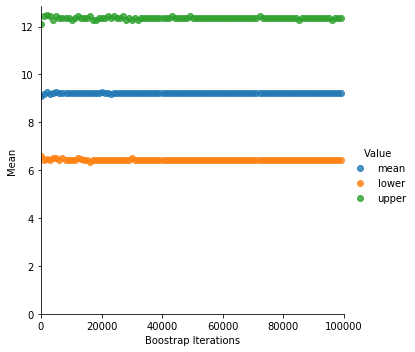

In [32]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    resamples = np.random.choice(sample, (iterations, sample_size), replace=True)
    data_mean= np.mean(resamples)
    mean_list=[]
    for i in range(len(resamples)):
      new_sample= resamples[i,:]
      sample_mean=np.mean(new_sample)
      mean_list.append(sample_mean)
    lower=np.percentile(mean_list, (100-ci)/2)
    upper= np.percentile(mean_list, ci+(100-ci)/2)
    return data_mean, lower, upper

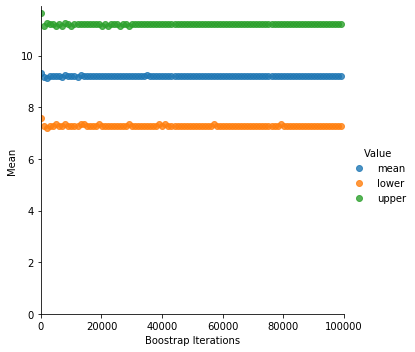

In [43]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


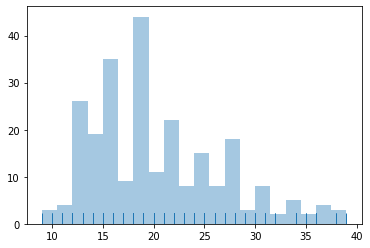

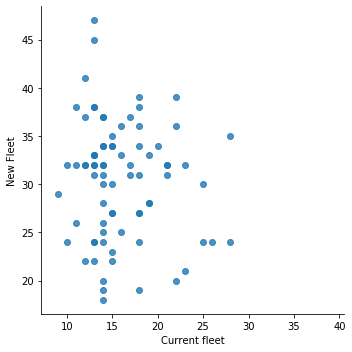

In [51]:
# Load and visualise the vehicles dataset
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df.values.T[1]
datacol= df[df.columns[0]].values
sns.distplot(datacol,bins=20,kde=False,rug=True)
sns.lmplot(df.columns[0],df.columns[1],data=df,fit_reg=False)


# Note: you can add more cells as needed to organise your code and your plots


In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [54]:
x= df[~np.isnan(df)]
new_fleet= np.mean(x)
print(new_fleet)



Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [73]:
boots = []
boot = boostrap_mean_ci(datacol, datacol.shape[0], i, 80)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])
df_boot2 =pd.DataFrame(boots2, columns=["Bootstarp Iteration", "Mean", "Value"])
print(df_boot)

Empty DataFrame
Columns: [Bootstarp Iteration, Mean, Value]
Index: []


In [72]:
data2= datacol[np.logical_not(np.isnan(datacol))]
boots1 = []
boot1 = boostrap_mean_ci(data2, data2.shape[0], i, 80)
boots1.append([i, boot1[0], "mean"])
boots1.append([i, boot1[1], "lower"])
boots1.append([i, boot1[2], "upper"])
df_boot1 =pd.DataFrame(boots, columns=["Bootstarp Iteration", "Mean", "Value"])
print(df_boot1)

   Bootstarp Iteration       Mean  Value
0                  100  20.172209   mean
1                  100  19.630120  lower
2                  100  20.710040  upper
3                  100  20.138835   mean
4                  100  19.650201  lower
5                  100  20.661044  upper
